In [2]:
import gnlse
import numpy as np 
import pylab as plt

In [21]:

class SinEnvelope(gnlse.envelopes.Envelope):
    """Amplitude envelope of sinusoidal signal.

    Attributes
    ----------
    Pmax : float
        Peak power, [W].
    F0 : float
        Fondamental oscillation frequency.
    """

    def __init__(self, Pmax, F0):
        self.name = 'Sinusoidial envelope'
        self.Pmax = Pmax
        self.F0 = F0

    def A(self, T):
        """

        Parameters
        ----------
        T : ndarray, (n, )
            Time vector

        Returns
        -------
        ndarray, (n, )
            Amplitude envelope of sinusoidal impulse in time.
        """
        
        return 0.5*np.sqrt(self.Pmax) *(1 + np.sin(2*np.pi*self.F0*T))

In [22]:
    setup = gnlse.GNLSESetup()

    # Numerical parameters
    setup.resolution = 2**14
    setup.time_window = 12.5  # ps
    setup.z_saves = 200

    # Physical parameters
    λ = 1550 #nm
    setup.wavelength = λ
    w0 = (2.0 * np.pi * gnlse.common.c) / setup.wavelength  # 1/ps = THz
    setup.fiber_length = 0.15  # m
    setup.self_steepening = True

    # Input impulse parameters
    power = 10000
    # pulse duration [ps]
    f0 = 1e10
    neff = 1.46
    α = 0.2
    # Fiber caracteristics
    γ = 
    setup.nonlinearity = γ
    setup.dispersion_model = gnlse.DispersionFiberFromInterpolation(α, neff, λ,λ)
    # sinus envelope
    envelope = SinEnvelope(power, f0)
    setup.impulse_model = envelope 

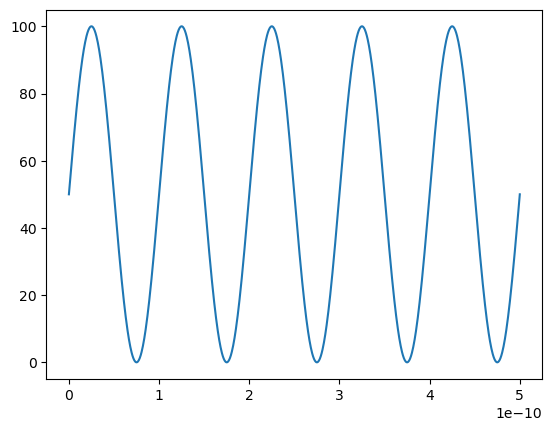

In [24]:
 T = np.linspace(0, 5/f0, 1000)
 plt.plot(T, envelope.A(T))
 plt.show()

In [ ]:
    setup.dispersion = model[1]
    setup.nonlinearity = model[2]
    solver = gnlse.GNLSE(setup)
    solution = solver.run()
